<a href="https://colab.research.google.com/github/Strong649/First-Repo/blob/main/st20121704_CMP7005_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

**Task 1**

In [ ]:
uploaded = files.upload()

Saving Merged Beijing CSV.csv to Merged Beijing CSV.csv


In [ ]:
import io                     # importing and combining all csv files into one dataset.

dfs = []
for filename in uploaded.keys():
  if filename.endswith('.csv'):
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
print("Missing values per Column:")
print(combined_df.isnull().sum())

Missing values per Column:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [ ]:
print("Missing values per Station:")
print(combined_df.groupby('station').apply(lambda x: x.isnull().sum()))

Missing values per Station:
               No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
station                                                                    
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575

<ipython-input-7-3af3953c0f0a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(combined_df.groupby('station').apply(lambda x: x.isnull().sum()))


In [ ]:
print("Total missing values per Station:")
print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))                   # finding which station has the largest amount of missing values

Total missing values per Station:
station
Aotizhongxin     7271
Changping        5166
Dingling         7015
Dongsi           7600
Guanyuan         5279
Gucheng          4728
Huairou          7485
Nongzhanguan     4090
Shunyi           8523
Tiantan          5277
Wanliu           6447
Wanshouxigong    5146
dtype: int64


<ipython-input-8-7596088eb6f2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))                   # finding which station has the largest amount of missing values


In [ ]:
for column in combined_df.columns:
  if column != 'wd':  # Exclude the 'wd' column
    if combined_df[column].isnull().any():
      combined_df[column].fillna(combined_df[column].mean(), inplace=True)                 # using mean values to make sure the dataset is still fluid.

<ipython-input-9-ec7f03fecaea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna(combined_df[column].mean(), inplace=True)                 # using mean values to make sure the dataset is still fluid.


In [ ]:
print("Missing values per Station:")
print(combined_df.groupby('station').apply(lambda x: x.isnull().sum()))

Missing values per Station:
               No  year  month  day  hour  PM2.5  PM10  SO2  NO2  CO  O3  \
station                                                                    
Aotizhongxin    0     0      0    0     0      0     0    0    0   0   0   
Changping       0     0      0    0     0      0     0    0    0   0   0   
Dingling        0     0      0    0     0      0     0    0    0   0   0   
Dongsi          0     0      0    0     0      0     0    0    0   0   0   
Guanyuan        0     0      0    0     0      0     0    0    0   0   0   
Gucheng         0     0      0    0     0      0     0    0    0   0   0   
Huairou         0     0      0    0     0      0     0    0    0   0   0   
Nongzhanguan    0     0      0    0     0      0     0    0    0   0   0   
Shunyi          0     0      0    0     0      0     0    0    0   0   0   
Tiantan         0     0      0    0     0      0     0    0    0   0   0   
Wanliu          0     0      0    0     0      0     0    0 

<ipython-input-10-3af3953c0f0a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(combined_df.groupby('station').apply(lambda x: x.isnull().sum()))


In [ ]:
print("Total missing values per Station:")
print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))

Total missing values per Station:
station
Aotizhongxin      81
Changping        140
Dingling         140
Dongsi            78
Guanyuan          81
Gucheng          159
Huairou          302
Nongzhanguan      78
Shunyi           483
Tiantan           78
Wanliu           123
Wanshouxigong     79
dtype: int64


<ipython-input-11-e6ed9f03681b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))


In [ ]:
if 'wd' in combined_df.columns:
  combined_df = combined_df.drop('wd', axis=1)                # dropped the wind direction column to insure that all other columns were fully filled.

In [ ]:
print("Total missing values per Station:")
print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))

Total missing values per Station:
station
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64


<ipython-input-13-e6ed9f03681b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(combined_df.groupby('station').apply(lambda x: x.isnull().sum().sum()))


In [ ]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin


In [ ]:
combined_df['date'] = pd.to_datetime(combined_df[['day', 'month', 'year']])                 # creating date tag to help with data clumping.

In [ ]:
combined_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin,2013-03-01
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3.7,Aotizhongxin,2013-03-01
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,2.5,Aotizhongxin,2013-03-01
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,3.8,Aotizhongxin,2013-03-01
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,4.1,Aotizhongxin,2013-03-01
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,2.6,Aotizhongxin,2013-03-01


In [ ]:
combined_df = combined_df.groupby(['date', 'station']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
}).reset_index()

combined_df

,date,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013-03-01,Aotizhongxin,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,0.0,3.254167
1,2013-03-01,Changping,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2,2013-03-01,Dingling,6.375000,14.591885,3.000000,34.634057,204.166667,81.958333,0.812500,1023.858333,-19.583333,0.0,2.133333
3,2013-03-01,Dongsi,6.416667,9.875000,8.784618,29.443274,430.448602,72.140511,1.325000,1028.783333,-21.466667,0.0,3.308333
4,2013-03-01,Guanyuan,7.541667,11.666667,8.500000,28.500000,400.000000,63.166667,1.391667,1026.875000,-18.745833,0.0,3.254167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2017-02-28,Nongzhanguan,25.307512,28.066776,7.701285,36.276608,555.448602,56.140511,10.958333,1014.887500,-12.783333,0.0,2.058333
17528,2017-02-28,Shunyi,20.708333,28.500000,7.125000,39.666667,579.166667,57.291667,9.250000,1015.550000,-10.429167,0.0,2.025000
17529,2017-02-28,Tiantan,14.875000,32.708333,7.235903,43.871490,598.397205,57.562045,10.958333,1014.887500,-12.783333,0.0,2.058333
17530,2017-02-28,Wanliu,9.958333,25.583333,7.458333,40.916667,479.166667,54.791667,10.516667,1013.345833,-12.266667,0.0,1.800000


In [ ]:
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,17532,2015-03-01 00:00:00,2013-03-01 00:00:00,2014-03-01 00:00:00,2015-03-01 00:00:00,2016-02-29 00:00:00,2017-02-28 00:00:00,NaN
PM2.5,17532.0,79.793428,3.0,31.191119,61.257923,106.708333,567.416667,67.96019
PM10,17532.0,104.602618,4.833333,49.829194,88.104167,136.875,584.666667,73.375104
SO2,17532.0,15.830835,1.0,4.083333,9.208333,20.125,156.416667,17.963774
NO2,17532.0,50.638586,2.0,31.125,46.022917,64.5,193.333333,27.410892
CO,17532.0,1230.766454,100.0,641.666667,979.166667,1458.333333,8904.166667,940.93021
O3,17532.0,57.372271,1.0,27.259682,52.166667,80.916667,505.390511,37.870394
TEMP,17532.0,13.538976,-15.683333,3.035417,15.0125,23.475,32.366667,10.818934
PRES,17532.0,1010.746982,985.7875,1002.329167,1010.51875,1018.9125,1041.025,10.261052
DEWP,17532.0,2.490822,-33.020833,-9.1875,2.764583,14.995833,27.616667,13.523176


Need to calculate air quality index using formula

In [ ]:
# prompt: air quality index

def calculate_aqi(pm25, pm10, so2, no2, co, o3):
  """Calculates the Air Quality Index (AQI) based on pollutant concentrations."""

  def get_aqi_category(iaqi):
    if iaqi <= 50:
      return "Good"
    elif iaqi <= 100:
      return "Moderate"
    elif iaqi <= 150:
      return "Unhealthy for Sensitive Groups"
    elif iaqi <= 200:
      return "Unhealthy"
    elif iaqi <= 300:
      return "Very Unhealthy"
    else:
      return "Hazardous"


  def calculate_iaqi(pollutant, concentration, breakpoints):
    for i in range(len(breakpoints['concentration']) - 1):
      if breakpoints['concentration'][i] <= concentration <= breakpoints['concentration'][i + 1]:
        iaqi_low = breakpoints['iaqi'][i]
        iaqi_high = breakpoints['iaqi'][i + 1]
        concentration_low = breakpoints['concentration'][i]
        concentration_high = breakpoints['concentration'][i + 1]

        iaqi = ((iaqi_high - iaqi_low) / (concentration_high - concentration_low)) * (concentration - concentration_low) + iaqi_low
        return round(iaqi)
    return None

  pm25_breakpoints = {
      'concentration': [0, 12, 35.5, 55.5, 150.5, 250.5, 350.5, 500.5],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }

  pm10_breakpoints = {
      'concentration': [0, 54, 154, 254, 354, 424, 504, 604],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }

  so2_breakpoints = {
      'concentration': [0, 35, 75, 185, 304, 604, 804, 1004],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }

  no2_breakpoints = {
      'concentration': [0, 40, 80, 180, 280, 564, 744, 944],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }

  co_breakpoints = {
      'concentration': [0, 4.5, 9.5, 12.5, 15.5, 30.5, 40.5, 50.5],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }

  o3_breakpoints = {
      'concentration': [0, 55, 71, 86, 106, 201, 404, 804],
      'iaqi': [0, 50, 100, 150, 200, 300, 400, 500]
  }


  iaqi_pm25 = calculate_iaqi('PM2.5', pm25, pm25_breakpoints)
  iaqi_pm10 = calculate_iaqi('PM10', pm10, pm10_breakpoints)
  iaqi_so2 = calculate_iaqi('SO2', so2, so2_breakpoints)
  iaqi_no2 = calculate_iaqi('NO2', no2, no2_breakpoints)
  iaqi_co = calculate_iaqi('CO', co, co_breakpoints)
  iaqi_o3 = calculate_iaqi('O3', o3, o3_breakpoints)


  iaqi_values = [iaqi_pm25, iaqi_pm10, iaqi_so2, iaqi_no2, iaqi_co, iaqi_o3]
  iaqi_values = [val for val in iaqi_values if val is not None]

  if not iaqi_values:
    return None

  aqi = max(iaqi_values)
  aqi_category = get_aqi_category(aqi)
  return aqi, aqi_category

combined_df['AQI'], combined_df['AQI_Category'] = zip(*combined_df.apply(lambda row: calculate_aqi(row['PM2.5'], row['PM10'], row['SO2'], row['NO2'], row['CO'], row['O3']), axis=1))

In [ ]:
combined_df

,date,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI,AQI_Category
0,2013-03-01,Aotizhongxin,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,0.0,3.254167,78,Moderate
1,2013-03-01,Changping,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333,123,Unhealthy for Sensitive Groups
2,2013-03-01,Dingling,6.375000,14.591885,3.000000,34.634057,204.166667,81.958333,0.812500,1023.858333,-19.583333,0.0,2.133333,137,Unhealthy for Sensitive Groups
3,2013-03-01,Dongsi,6.416667,9.875000,8.784618,29.443274,430.448602,72.140511,1.325000,1028.783333,-21.466667,0.0,3.308333,104,Unhealthy for Sensitive Groups
4,2013-03-01,Guanyuan,7.541667,11.666667,8.500000,28.500000,400.000000,63.166667,1.391667,1026.875000,-18.745833,0.0,3.254167,76,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2017-02-28,Nongzhanguan,25.307512,28.066776,7.701285,36.276608,555.448602,56.140511,10.958333,1014.887500,-12.783333,0.0,2.058333,78,Moderate
17528,2017-02-28,Shunyi,20.708333,28.500000,7.125000,39.666667,579.166667,57.291667,9.250000,1015.550000,-10.429167,0.0,2.025000,69,Moderate
17529,2017-02-28,Tiantan,14.875000,32.708333,7.235903,43.871490,598.397205,57.562045,10.958333,1014.887500,-12.783333,0.0,2.058333,58,Moderate
17530,2017-02-28,Wanliu,9.958333,25.583333,7.458333,40.916667,479.166667,54.791667,10.516667,1013.345833,-12.266667,0.0,1.800000,51,Moderate


In [ ]:
# combining rows by month of each year and by station

combined_df['year_month'] = combined_df['date'].dt.to_period('M')
combined_df_monthly = combined_df.groupby(['year_month', 'station']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
    'AQI': 'mean'
}).reset_index()

combined_df_monthly

,year_month,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
0,2013-03,Aotizhongxin,110.092742,143.947047,44.711167,74.714959,1464.982952,47.648693,6.053629,1012.547446,-5.729435,0.026210,2.000134,176.935484
1,2013-03,Changping,98.916667,123.430108,34.916756,59.341807,1385.356577,59.944214,5.904032,1009.412903,-7.478763,0.031048,1.723790,173.000000
2,2013-03,Dingling,95.705645,110.272867,24.335166,48.377087,1025.251424,68.083353,5.904032,1009.412903,-7.478763,0.031048,1.723790,177.096774
3,2013-03,Dongsi,108.393540,130.951889,39.670655,76.727859,1480.658254,59.458223,6.256989,1014.456855,-7.030511,0.020968,1.969624,181.354839
4,2013-03,Guanyuan,102.719086,128.774469,45.558070,73.609353,1488.684847,59.496873,6.053629,1012.547446,-5.729435,0.026210,2.000134,172.774194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2017-02,Nongzhanguan,77.085192,94.029840,19.326811,49.830968,1182.406045,43.618776,2.661533,1022.020585,-13.627679,0.006101,1.953869,143.535714
572,2017-02,Shunyi,70.693613,80.951543,19.468454,50.064437,1245.524201,49.023571,1.986161,1022.753274,-13.280655,0.005506,2.132589,141.428571
573,2017-02,Tiantan,72.231381,96.293519,13.999430,55.769956,1196.542949,46.317975,2.661533,1022.020585,-13.627679,0.006101,1.953869,140.321429
574,2017-02,Wanliu,69.946589,85.974455,20.276238,62.086221,1308.562197,42.045512,2.256324,1020.446032,-13.190625,0.006101,1.735565,138.392857


In [ ]:
# combining each year of each station

combined_df_yearly = combined_df.groupby(['station', combined_df['date'].dt.year]).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
    'AQI': 'mean'
}).reset_index()

combined_df_yearly

,station,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
0,Aotizhongxin,2013,82.388579,112.909452,23.471780,63.332402,1183.741860,50.299805,15.497740,1008.200408,6.465400,0.071582,1.532993,158.068627
1,Aotizhongxin,2014,90.161779,121.086504,20.996412,63.134588,1192.397075,50.011250,13.878128,1011.318082,4.162203,0.056610,1.476895,165.742466
2,Aotizhongxin,2015,82.061094,111.973078,14.388873,60.820600,1395.042975,63.778188,13.478417,1012.568175,2.736139,0.072686,1.895589,169.660274
3,Aotizhongxin,2016,74.218970,94.773781,10.935830,48.505852,1196.019821,61.946820,13.863281,1012.822881,2.287128,0.079753,1.859272,160.379781
4,Aotizhongxin,2017,94.593005,107.300169,20.771035,66.099670,1667.758517,47.590086,0.773985,1023.499153,-13.069987,0.003608,1.958975,165.525424
5,Changping,2013,72.676632,91.270701,19.239312,41.342017,1061.924320,61.393397,15.961397,1004.957489,4.471882,0.066068,1.647685,157.741830
6,Changping,2014,79.423088,106.536439,20.980037,45.739661,1197.670276,63.065953,14.172511,1008.153664,1.037260,0.037888,1.868642,166.627397
7,Changping,2015,70.001634,94.461360,11.860850,42.937849,1163.570364,57.900262,13.611024,1007.861979,1.848322,0.082568,1.838830,153.487671
8,Changping,2016,61.891331,86.531176,8.290718,45.632718,1124.786282,53.898321,13.491618,1007.923108,1.647659,0.065329,1.982735,140.497268
9,Changping,2017,80.098240,94.455391,16.427467,51.015945,1525.619253,33.393594,0.541922,1018.329310,-13.948672,0.001868,2.120889,138.915254


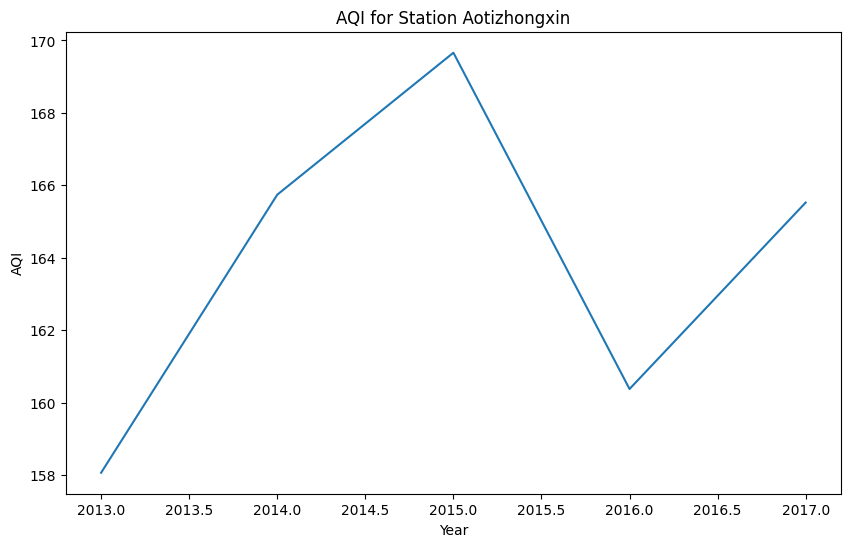

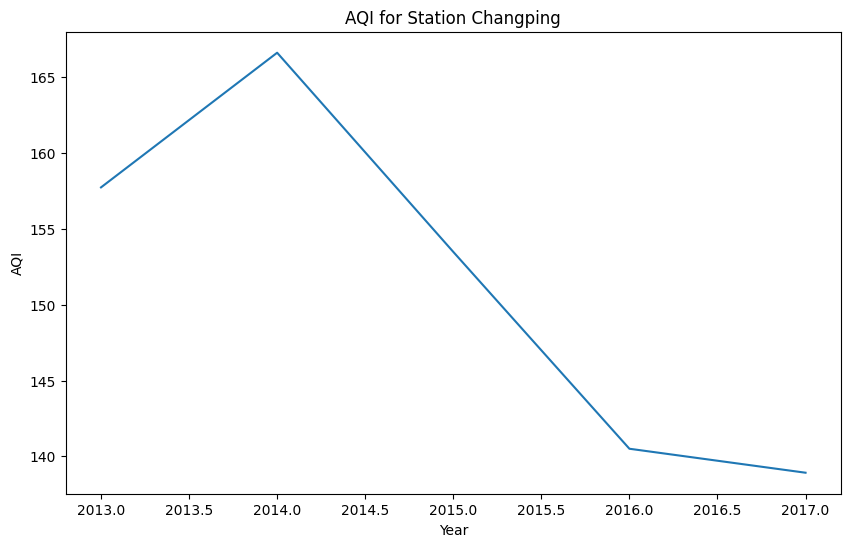

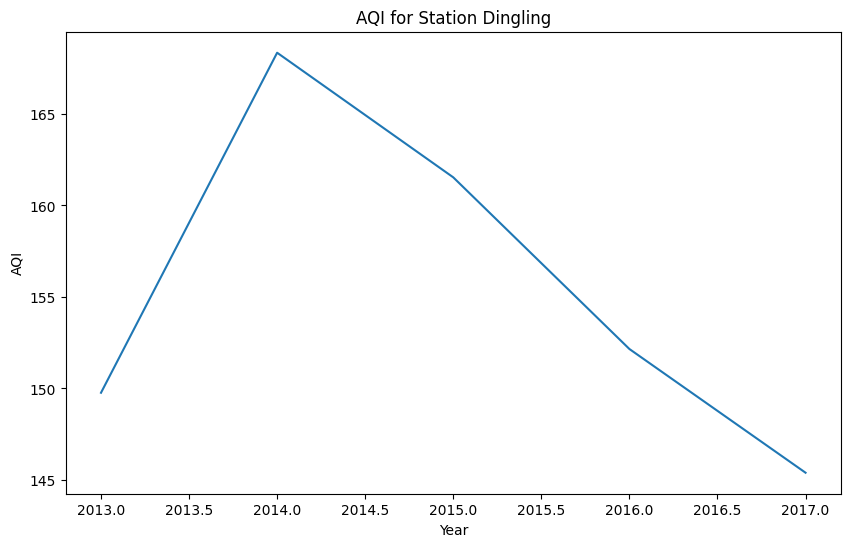

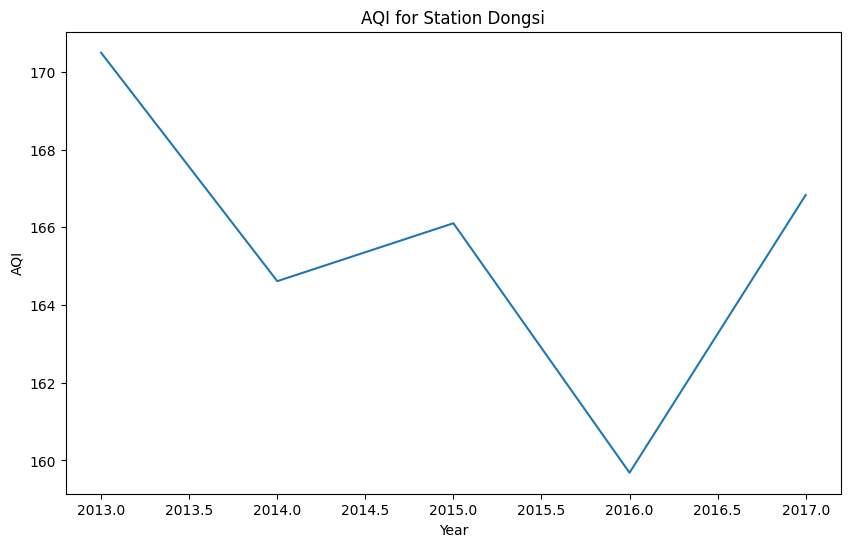

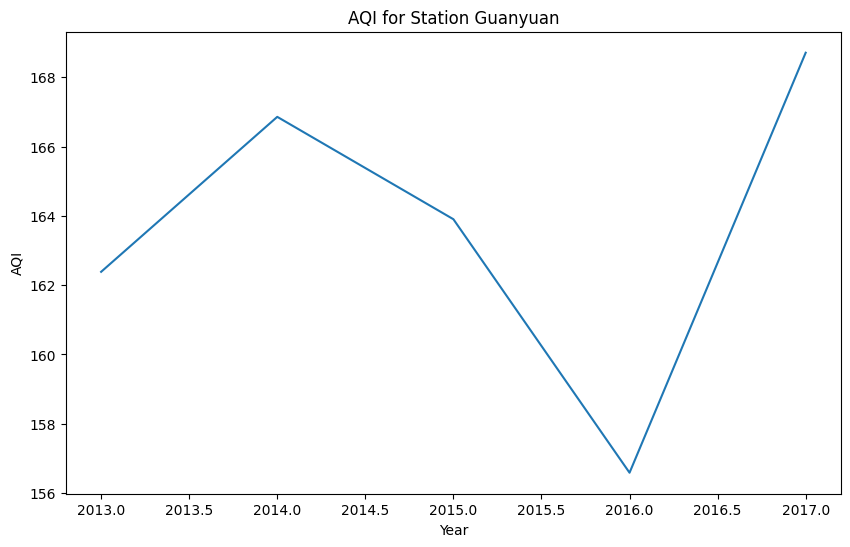

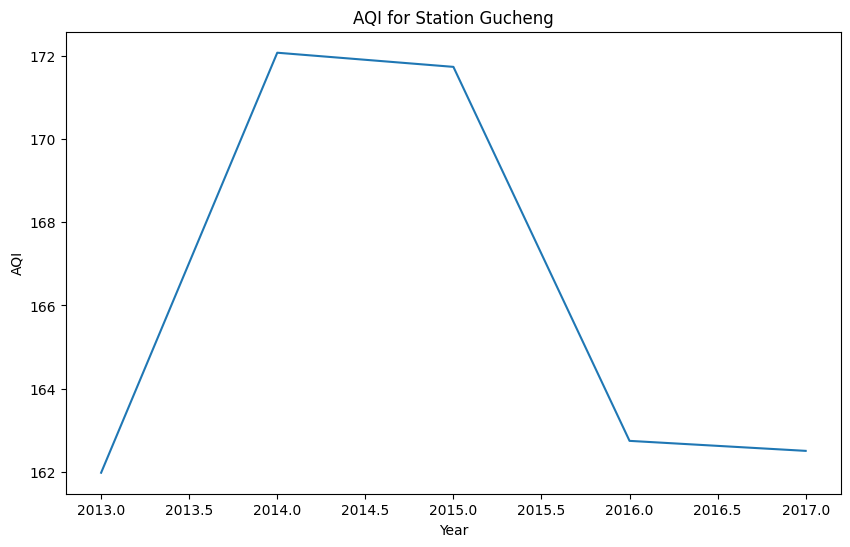

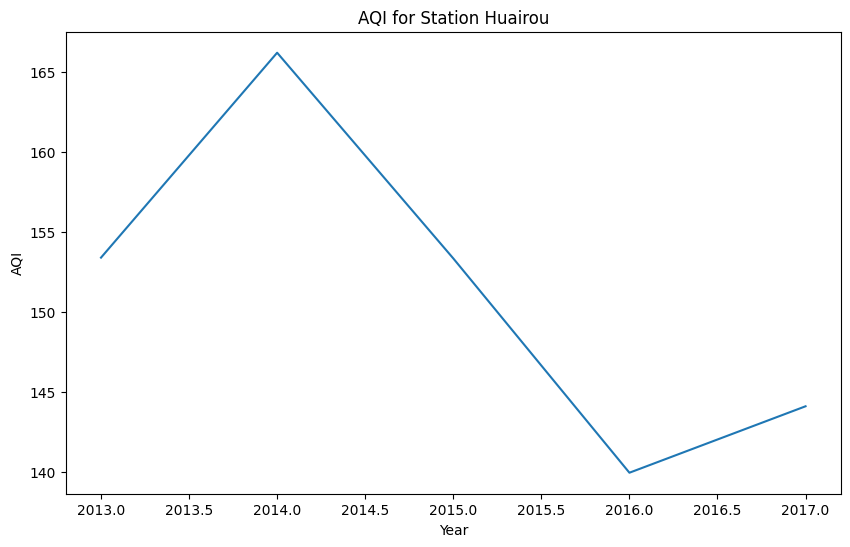

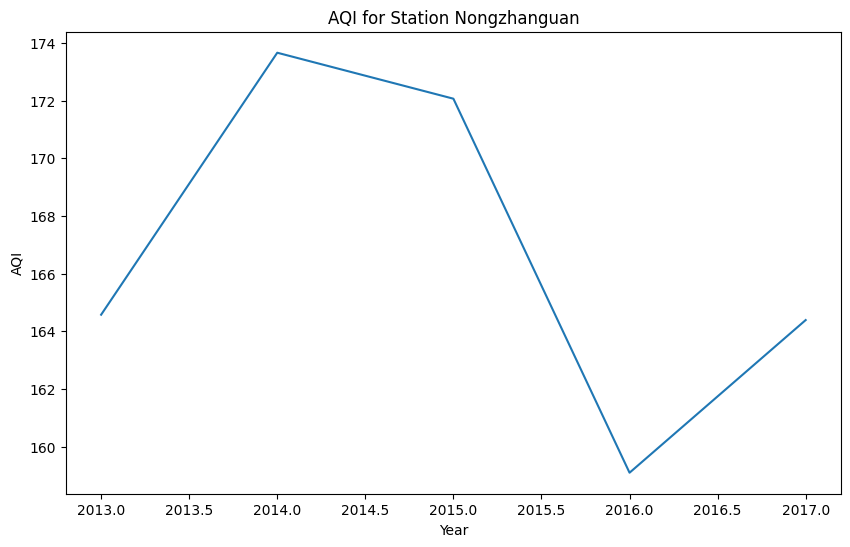

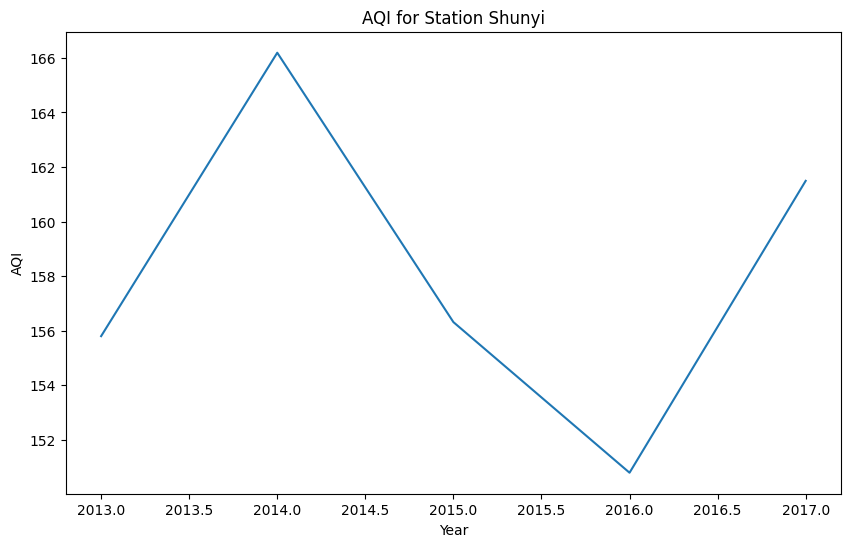

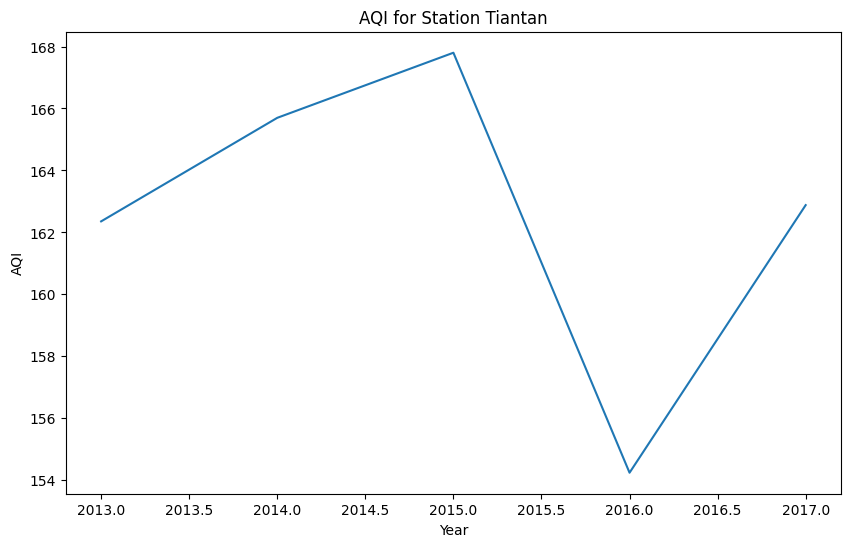

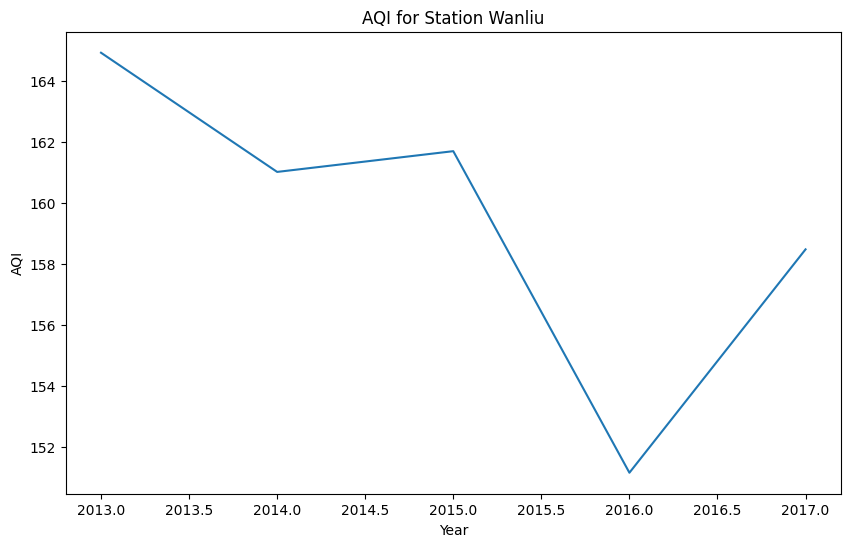

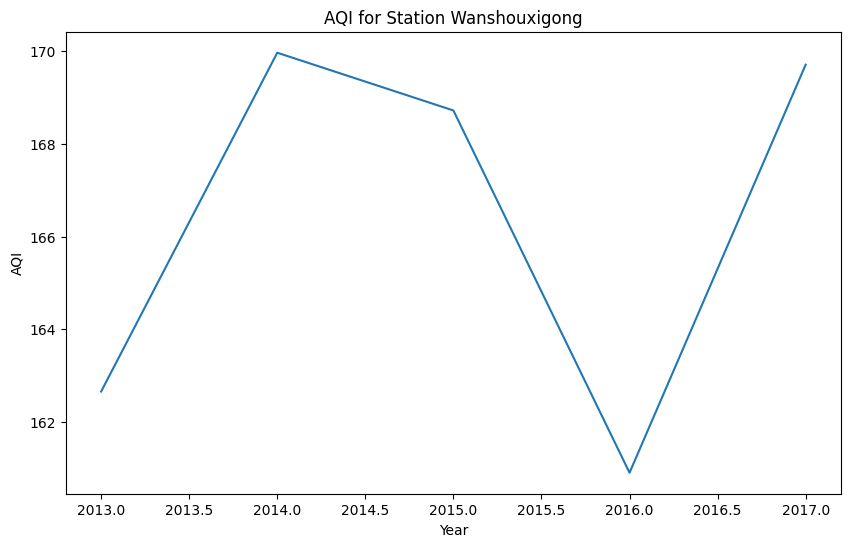

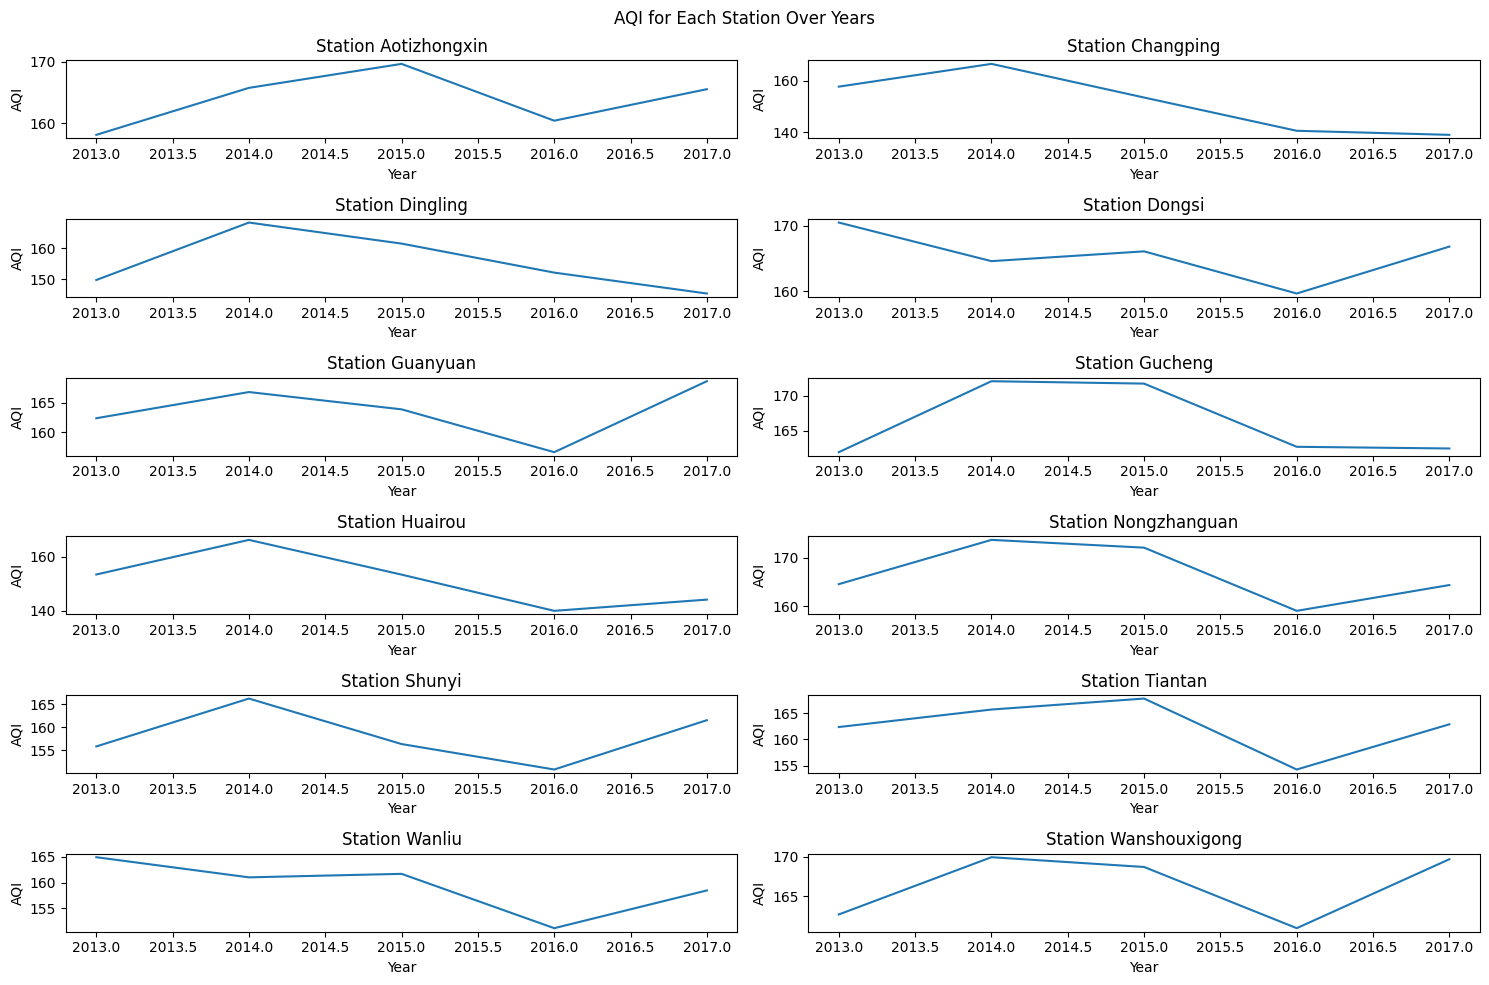

In [ ]:
# subplot for each station each year aqi value

import matplotlib.pyplot as plt

# Assuming combined_df_yearly is your DataFrame with yearly AQI data
# Grouped by station and year
for station in combined_df_yearly['station'].unique():
  station_data = combined_df_yearly[combined_df_yearly['station'] == station]
  plt.figure(figsize=(10, 6))
  plt.title(f'AQI for Station {station}')
  plt.xlabel('Year')
  plt.ylabel('AQI')
  plt.plot(station_data['date'], station_data['AQI'])
  plt.show()


# subplots for better visualization
num_stations = len(combined_df_yearly['station'].unique())
num_rows = (num_stations + 1) // 2  # Calculate rows needed for subplots
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('AQI for Each Station Over Years')

for i, station in enumerate(combined_df_yearly['station'].unique()):
  row = i // num_cols
  col = i % num_cols

  station_data = combined_df_yearly[combined_df_yearly['station'] == station]
  axes[row, col].plot(station_data['date'], station_data['AQI'])
  axes[row, col].set_title(f'Station {station}')
  axes[row, col].set_xlabel('Year')
  axes[row, col].set_ylabel('AQI')

plt.tight_layout()
plt.show()

In [ ]:
# subplot each stations aqi combined onto one graph

import plotly.express as px

fig = px.line(
    combined_df_yearly,
    x='date',
    y='AQI',
    color='station',
    title='AQI for All Stations Over Years',
    labels={'date': 'Year', 'AQI': 'AQI'}
)

fig.show()

# using plotly to be able to manipulate the graph to select which stations to focus upon.

In [ ]:
combined_df_monthly

,year_month,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
0,2013-03,Aotizhongxin,110.092742,143.947047,44.711167,74.714959,1464.982952,47.648693,6.053629,1012.547446,-5.729435,0.026210,2.000134,176.935484
1,2013-03,Changping,98.916667,123.430108,34.916756,59.341807,1385.356577,59.944214,5.904032,1009.412903,-7.478763,0.031048,1.723790,173.000000
2,2013-03,Dingling,95.705645,110.272867,24.335166,48.377087,1025.251424,68.083353,5.904032,1009.412903,-7.478763,0.031048,1.723790,177.096774
3,2013-03,Dongsi,108.393540,130.951889,39.670655,76.727859,1480.658254,59.458223,6.256989,1014.456855,-7.030511,0.020968,1.969624,181.354839
4,2013-03,Guanyuan,102.719086,128.774469,45.558070,73.609353,1488.684847,59.496873,6.053629,1012.547446,-5.729435,0.026210,2.000134,172.774194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2017-02,Nongzhanguan,77.085192,94.029840,19.326811,49.830968,1182.406045,43.618776,2.661533,1022.020585,-13.627679,0.006101,1.953869,143.535714
572,2017-02,Shunyi,70.693613,80.951543,19.468454,50.064437,1245.524201,49.023571,1.986161,1022.753274,-13.280655,0.005506,2.132589,141.428571
573,2017-02,Tiantan,72.231381,96.293519,13.999430,55.769956,1196.542949,46.317975,2.661533,1022.020585,-13.627679,0.006101,1.953869,140.321429
574,2017-02,Wanliu,69.946589,85.974455,20.276238,62.086221,1308.562197,42.045512,2.256324,1020.446032,-13.190625,0.006101,1.735565,138.392857


In [ ]:
combined_df_monthly.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,576.0,79.823990,26.104308,35.451013,60.066227,75.629821,94.974031,167.024162
PM10,576.0,104.578285,29.621881,45.259168,81.580184,102.471341,127.107235,188.111025
SO2,576.0,15.878908,12.589449,2.381018,6.365009,11.778542,21.433109,62.220127
NO2,576.0,50.626307,16.900085,9.177938,39.852066,50.061239,61.997798,109.967533
CO,576.0,1230.911677,500.809759,466.211689,862.942322,1077.705009,1489.772020,3192.090545
O3,576.0,57.277188,29.315016,11.853436,30.100413,53.403679,83.183277,119.506132
TEMP,576.0,13.477764,10.383635,-6.183468,2.661533,13.837030,22.377941,28.380242
PRES,576.0,1010.795655,8.962323,992.801210,1002.417083,1011.331060,1018.502600,1026.777285
DEWP,576.0,2.419025,12.440563,-18.604570,-9.127923,4.019288,14.360556,21.521774
RAIN,576.0,0.064183,0.088172,0.000000,0.002976,0.020027,0.094718,0.502016


In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'AQI']

In [ ]:
combined_df.columns

Index(['date', 'station', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'AQI', 'AQI_Category', 'year_month'],
      dtype='object')

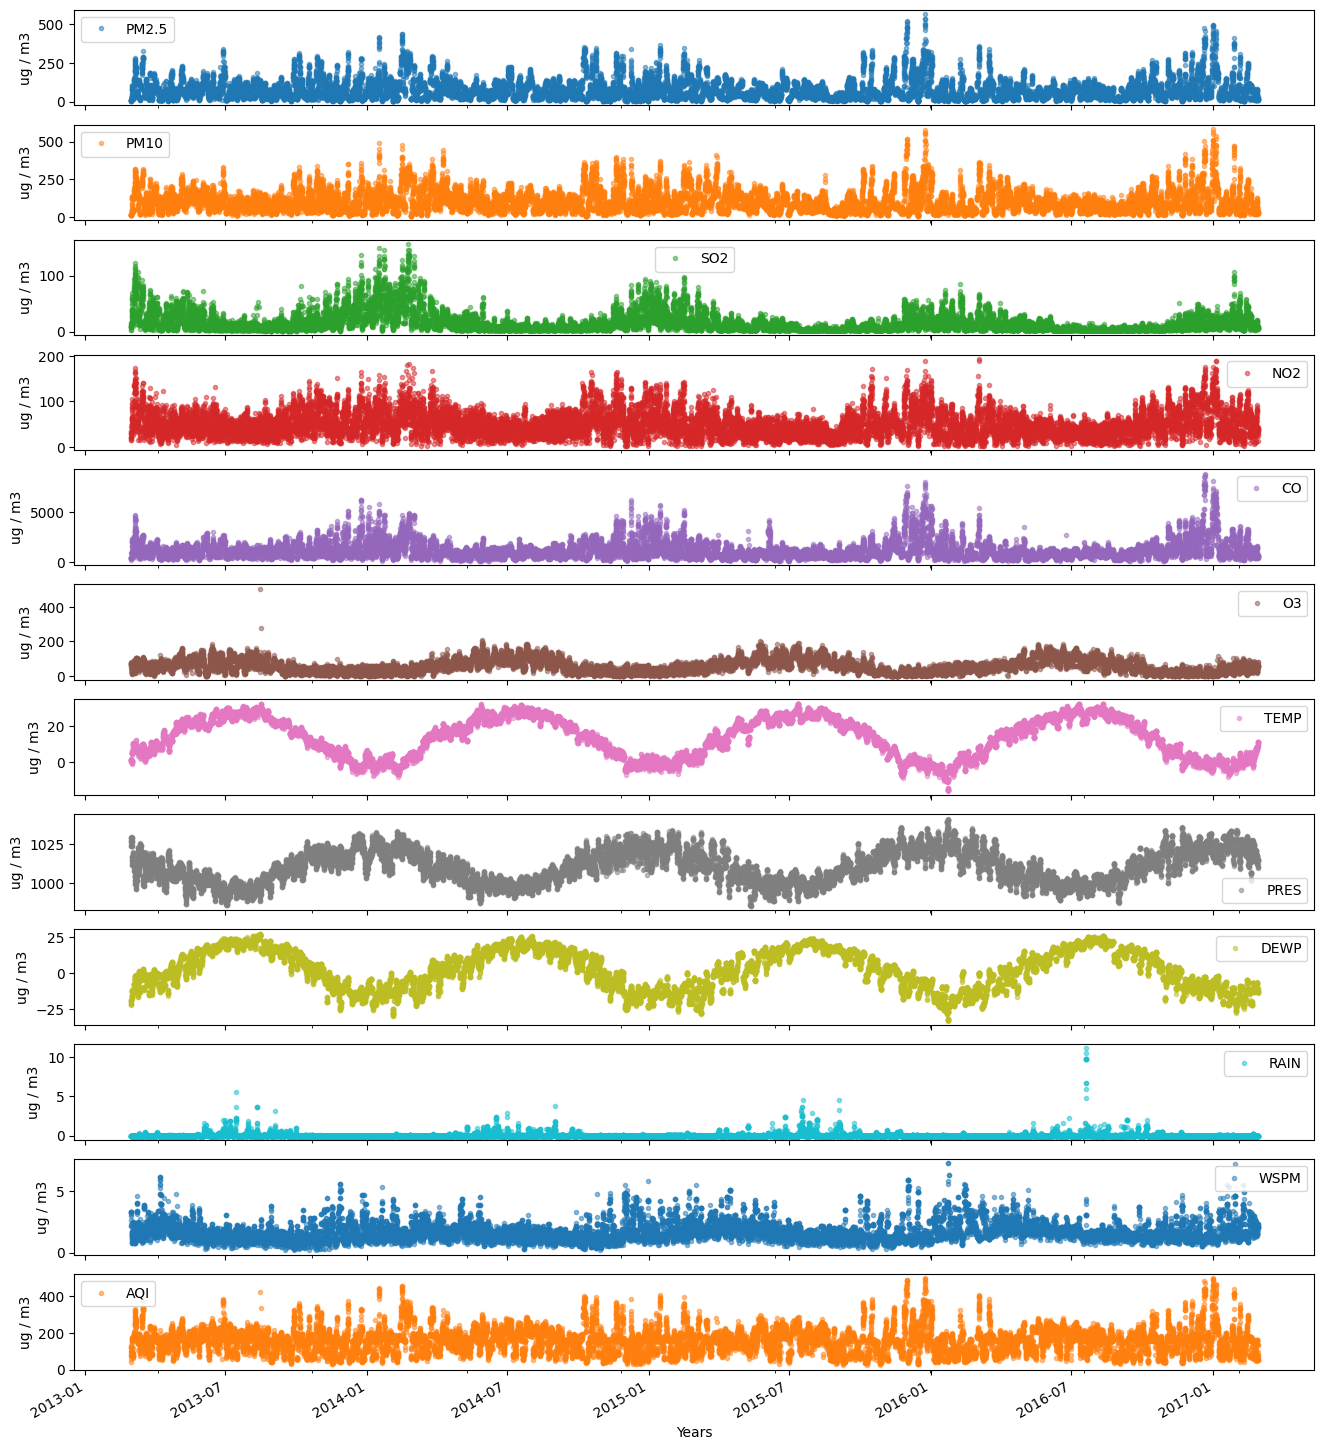

In [ ]:
combined_df.set_index('date',inplace=True)
axes = combined_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
!pip install folium

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.204.17.164


In [ ]:
!streamlit run app2.py & npx localtunnel --port 8501



Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.17.164:8501

y
your url is: https://many-cups-draw.loca.lt
  Stopping...
^C
